In [50]:
import os
import random
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib
from sklearn import metrics

%matplotlib inline

In [47]:
# define column names
cpu_col = 'CPU time [%]'
thr_col = 'Max. throughput [Gbit/s]'

In [48]:
# generate synthetic data
def gen_benchmark(cpu, coeff1=1, coeff2=1):
    """Generate max throughput for given CPU time according to log function"""
    return coeff1 * math.log2(1 + coeff2 * cpu)

def synthetic_benchmark():
    """Generate synthetic benchmark results for CPU time 0-100%"""
    cpu_list = np.arange(0.0, 1.0, 0.01)
    data = []
    for cpu in cpu_list:
        data.append([cpu, gen_benchmark(cpu, coeff2=10)])
    return pd.DataFrame(data, columns=[cpu_col, thr_col])

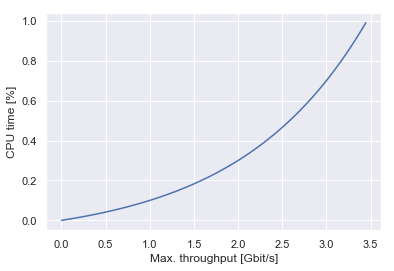

In [49]:
df = synthetic_benchmark()
sns.lineplot(df[thr_col], df[cpu_col])

In [52]:
# process data
# no need for validation or test split in this simple example
X = df[[thr_col]]
y = df[cpu_col]
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X_scaled = scaler.transform(X)

In [61]:
# train linear model
lin_reg = LinearRegression()
lin_reg.fit(X, y)
# predict
lin_col = 'Linear Regression'
df[lin_col] = lin_reg.predict(X)

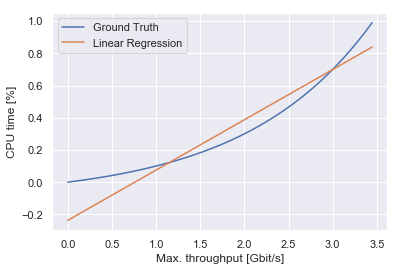

In [64]:
# plot prediction
plt.plot(df[thr_col], df[cpu_col], label='Ground Truth')
plt.plot(df[thr_col], df[lin_col])
plt.xlabel(thr_col)
plt.ylabel(cpu_col)
#plt.ylim(0, 1)
plt.legend()

In [ ]:
# TODO: add fixed resource allocation